### Preprocessing the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel(r"pizza_data.xlsx")

In [3]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,3,2.5,...,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21 12:15:00,2024-03-21 12:35:00,20,Small,Vegan,2,3.0,...,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,XL,Cheese Burst,5,4.5,...,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05 13:00:00,2024-05-05 13:20:00,20,Medium,Non-Veg,3,2.0,...,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458


In [4]:
#get the time taken for delivery in minutes by subtracting order time from delivery time
df['Time taken for delivery'] = (df['Delivery Time'] - df['Order Time']).dt.total_seconds()/60

In [5]:
df.columns

Index(['Order ID', 'Restaurant Name', 'Location', 'Order Time',
       'Delivery Time', 'Delivery Duration (min)', 'Pizza Size', 'Pizza Type',
       'Toppings Count', 'Distance (km)', 'Traffic Level', 'Payment Method',
       'Is Peak Hour', 'Is Weekend', 'Delivery Efficiency (min/km)',
       'Topping Density', 'Order Month', 'Payment Category',
       'Estimated Duration (min)', 'Delay (min)', 'Is Delayed',
       'Pizza Complexity', 'Traffic Impact', 'Order Hour',
       'Restaurant Avg Time', 'Time taken for delivery'],
      dtype='object')

In [6]:
necessary_columns = ['Pizza Size','Pizza Type','Toppings Count','Distance (km)', 'Traffic Level','Is Peak Hour','Is Weekend','Topping Density','Delay (min)',
                     'Is Delayed','Pizza Complexity','Traffic Impact','Time taken for delivery']
data = df[necessary_columns]

In [7]:
data

,Pizza Size,Pizza Type,Toppings Count,Distance (km),Traffic Level,Is Peak Hour,Is Weekend,Topping Density,Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Time taken for delivery
0,Medium,Veg,3,2.5,Medium,True,False,1.200000,9.0,False,6,2,15.0
1,Large,Non-Veg,4,5.0,High,True,False,0.800000,13.0,False,12,3,25.0
2,Small,Vegan,2,3.0,Low,False,False,0.666667,12.8,False,2,1,20.0
3,XL,Cheese Burst,5,4.5,Medium,True,False,1.111111,14.2,False,20,2,25.0
4,Medium,Non-Veg,3,2.0,High,False,True,1.500000,15.2,False,6,3,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,Large,Sicilian,4,5.5,Medium,True,False,0.727273,16.8,False,12,2,30.0
1000,Medium,Veg,2,4.0,Low,True,True,0.500000,20.4,False,4,1,30.0
1001,Medium,BBQ Chicken,3,5.0,Medium,True,True,0.600000,18.0,False,6,2,30.0
1002,XL,Cheese Burst,5,6.0,High,True,False,0.833333,15.6,False,20,3,30.0


### Categorical Mapping

In [8]:
traffic_level_mapping = {'Low':0,'Medium':2,'High':4}
pizza_size_mapping = {'Small':1,'Medium':2,'Large':4,'XL':6}
data['Traffic Level Encoded'] = data['Traffic Level'].map(traffic_level_mapping)
data['Pizza Size Encoded'] = data['Pizza Size'].map(pizza_size_mapping)
data = data.drop(columns=['Traffic Level','Pizza Size'],axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_8108\1414642613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Traffic Level Encoded'] = data['Traffic Level'].map(traffic_level_mapping)
C:\Users\dell\AppData\Local\Temp\ipykernel_8108\1414642613.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pizza Size Encoded'] = data['Pizza Size'].map(pizza_size_mapping)


In [9]:
pizza_type_dummies = pd.get_dummies(data["Pizza Type"], prefix="Pizza_Type")

In [10]:
data = pd.concat([pizza_type_dummies,data],axis=1)
data = data.drop('Pizza Type',axis=1)

In [11]:
for column in data.columns:
    if data[column].dtype == bool:
        data[column] = data[column].astype(int)
    else:
        continue

In [12]:
data

,Pizza_Type_BBQ Chicken,Pizza_Type_Cheese Burst,Pizza_Type_Deep Dish,Pizza_Type_Gluten-Free,Pizza_Type_Margarita,Pizza_Type_Non-Veg,Pizza_Type_Sicilian,Pizza_Type_Stuffed Crust,Pizza_Type_Thai Chicken,Pizza_Type_Thin Crust,...,Is Peak Hour,Is Weekend,Topping Density,Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Time taken for delivery,Traffic Level Encoded,Pizza Size Encoded
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1.200000,9.0,0,6,2,15.0,2,2
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0.800000,13.0,0,12,3,25.0,4,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0.666667,12.8,0,2,1,20.0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,1,0,1.111111,14.2,0,20,2,25.0,2,6
4,0,0,0,0,0,1,0,0,0,0,...,0,1,1.500000,15.2,0,6,3,20.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,0,0,0,0,0,0,1,0,0,0,...,1,0,0.727273,16.8,0,12,2,30.0,2,4
1000,0,0,0,0,0,0,0,0,0,0,...,1,1,0.500000,20.4,0,4,1,30.0,0,2
1001,1,0,0,0,0,0,0,0,0,0,...,1,1,0.600000,18.0,0,6,2,30.0,2,2
1002,0,1,0,0,0,0,0,0,0,0,...,1,0,0.833333,15.6,0,20,3,30.0,4,6


### Simple Linear Regression (Closed Form Solution)

In [13]:
X = data.drop('Time taken for delivery', axis=1)
y = data['Time taken for delivery']

In [14]:
X.insert(0, 'Intercept', 1)

In [15]:
X

,Intercept,Pizza_Type_BBQ Chicken,Pizza_Type_Cheese Burst,Pizza_Type_Deep Dish,Pizza_Type_Gluten-Free,Pizza_Type_Margarita,Pizza_Type_Non-Veg,Pizza_Type_Sicilian,Pizza_Type_Stuffed Crust,Pizza_Type_Thai Chicken,...,Distance (km),Is Peak Hour,Is Weekend,Topping Density,Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Traffic Level Encoded,Pizza Size Encoded
0,1,0,0,0,0,0,0,0,0,0,...,2.5,1,0,1.200000,9.0,0,6,2,2,2
1,1,0,0,0,0,0,1,0,0,0,...,5.0,1,0,0.800000,13.0,0,12,3,4,4
2,1,0,0,0,0,0,0,0,0,0,...,3.0,0,0,0.666667,12.8,0,2,1,0,1
3,1,0,1,0,0,0,0,0,0,0,...,4.5,1,0,1.111111,14.2,0,20,2,2,6
4,1,0,0,0,0,0,1,0,0,0,...,2.0,0,1,1.500000,15.2,0,6,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,1,0,0,0,0,0,0,1,0,0,...,5.5,1,0,0.727273,16.8,0,12,2,2,4
1000,1,0,0,0,0,0,0,0,0,0,...,4.0,1,1,0.500000,20.4,0,4,1,0,2
1001,1,1,0,0,0,0,0,0,0,0,...,5.0,1,1,0.600000,18.0,0,6,2,2,2
1002,1,0,1,0,0,0,0,0,0,0,...,6.0,1,0,0.833333,15.6,0,20,3,4,6


In [16]:
feature_matrix = X.values
solution_vector = y.values

In [17]:
import numpy as np
def calculate_coefficients(X, y):
    X_transpose = np.transpose(X)
    coefficients = np.linalg.inv(X_transpose @ X) @ X_transpose @ y
    return np.array(coefficients).flatten()

In [18]:
coefficients = calculate_coefficients(X, y)

In [19]:
coefficients

array([-4.21461172e+15,  4.21461172e+15,  4.21461172e+15,  4.21461172e+15,
        4.21461172e+15,  4.21461172e+15,  4.21461172e+15,  4.21461172e+15,
        4.21461172e+15,  4.21461172e+15,  4.21461172e+15,  4.21461172e+15,
        4.21461172e+15,  2.34699556e+01, -6.14595142e+00,  8.07983398e-01,
       -2.20754262e+00, -3.24777047e+01,  3.69176699e-01,  2.60104803e+01,
        1.42955053e+00, -1.47406693e+01,  8.62667746e+00, -1.74038561e-12])

In [20]:
def predict_delivery_time(X, coefficients):
    return X @ coefficients
predicted_delivery_time = predict_delivery_time(X, coefficients)

In [21]:
data['Predicted Delivery Time'] = predicted_delivery_time

In [22]:
data

,Pizza_Type_BBQ Chicken,Pizza_Type_Cheese Burst,Pizza_Type_Deep Dish,Pizza_Type_Gluten-Free,Pizza_Type_Margarita,Pizza_Type_Non-Veg,Pizza_Type_Sicilian,Pizza_Type_Stuffed Crust,Pizza_Type_Thai Chicken,Pizza_Type_Thin Crust,...,Is Weekend,Topping Density,Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Time taken for delivery,Traffic Level Encoded,Pizza Size Encoded,Predicted Delivery Time
0,0,0,0,0,0,0,0,0,0,0,...,0,1.200000,9.0,0,6,2,15.0,2,2,-37.448364
1,0,0,0,0,0,1,0,0,0,0,...,0,0.800000,13.0,0,12,3,25.0,4,4,-21.285510
2,0,0,0,0,0,0,0,0,0,0,...,0,0.666667,12.8,0,2,1,20.0,0,1,34.692090
3,0,1,0,0,0,0,0,0,0,0,...,0,1.111111,14.2,0,20,2,25.0,2,6,50.019977
4,0,0,0,0,0,1,0,0,0,0,...,1,1.500000,15.2,0,6,3,20.0,4,2,-59.832645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,0,0,0,0,0,0,1,0,0,0,...,0,0.727273,16.8,0,12,2,30.0,2,4,-36.106285
1000,0,0,0,0,0,0,0,0,0,0,...,1,0.500000,20.4,0,4,1,30.0,0,2,-50.773569
1001,1,0,0,0,0,0,0,0,0,0,...,1,0.600000,18.0,0,6,2,30.0,2,2,912.288428
1002,0,1,0,0,0,0,0,0,0,0,...,0,0.833333,15.6,0,20,3,30.0,4,6,52.852168


In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(data['Time taken for delivery'], data['Predicted Delivery Time'])
print(f"R-squared value: {r2:.4f}")

R-squared value: -1255.1771


In [24]:
# Check the condition number first
condition_number = np.linalg.cond(X.T @ X)
print(f"Condition number: {condition_number}")

# Check for perfect multicollinearity 
rank = np.linalg.matrix_rank(X)
print(f"Matrix rank: {rank}, Number of features: {X.shape[1]}")

# Look at the actual coefficient values
print(f"Coefficient range: {coefficients.min()} to {coefficients.max()}")

Condition number: 6.314663334061498e+19
Matrix rank: 22, Number of features: 24
Coefficient range: -4214611716841253.5 to 4214611716843477.5


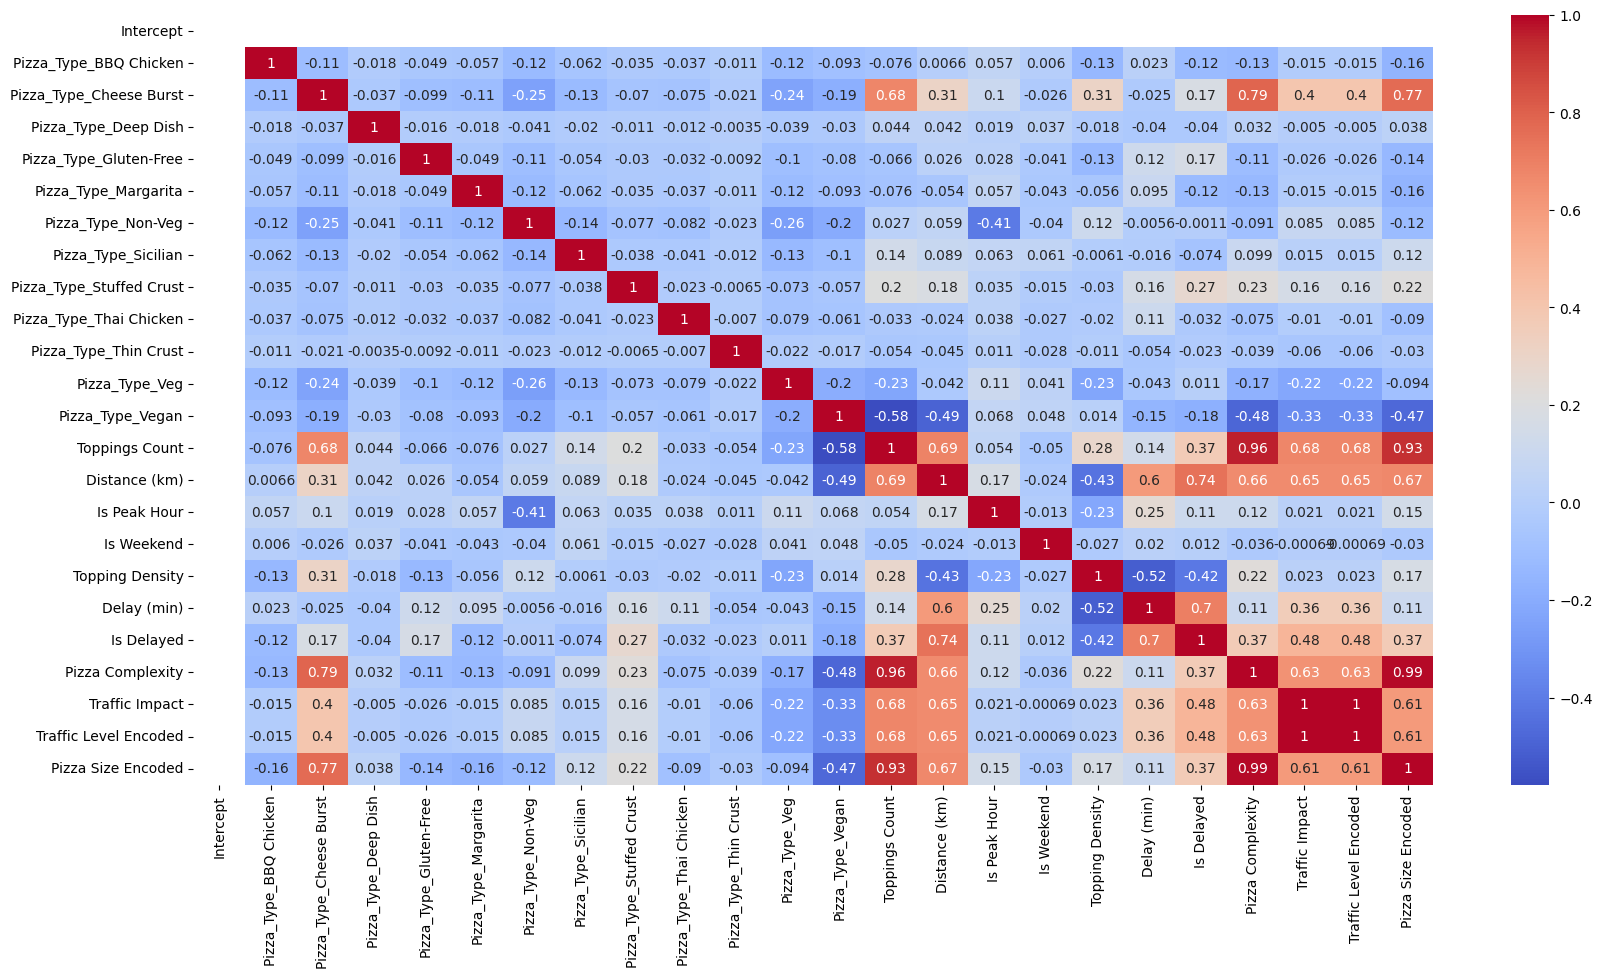

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data_matrix = pd.DataFrame(X, columns= X.columns)
plt.figure(figsize=(20,10))
sns.heatmap(data_matrix.corr(), annot=True, cmap="coolwarm")
plt.show()

In [57]:
## Since the condition number is high, the inverse of the matrix may not be stable and so are the coefficients.
## To deal with this, we can use regularization techniques like Ridge or Lasso regression.